(ch03)=
# Geological features

(ch03-1)=
## Primitive objects: Lines and planes

The fundamental geometric features of geology are lines (e.g. a lineation, a fold axis) and planes (e.g. bedding, a foliation). A *line* is the element generated by a moving point. It can be straight or curved. We will treat straight lines here. A *plane* is a flat surface; a line joining two points on the plane lies wholly on its surface, and two intersecting lines on the plane define the plane. This is equivalent to say that three non-collinear points on the plane define the plane (this is the basis for the well-known three-points problem). Obviously, linear features can be curved (e.g. the intersection of bedding with irregular topography), and surfaces can be non-planar (e.g. bedding in a fold). However, even these more complex cases can be expressed as a collection of lines and planes.

(ch03-2)=
## Lines and planes orientations

Two important properties of lines and planes are location ([Chapter 2](ch02)) and orientation (this chapter). Lines and planes orientations are measured with respect to the geographic north and the angle downward or upward from the horizontal. We refer to this coordinate system as the spherical coordinate system, and the measurements defining the lines and planes orientations as the spherical coordinates.

(ch03-2-1)=
### Planes: Strike and dip

A plane orientation can be defined by the angle a horizontal line on the plane makes with the geographic north, known as the *strike*, and the maximum angle measured downward from the horizontal to the plane, known as the *dip* ({numref}`Figure %s <ch03_fig01>`a). The strike is measured as an azimuth, an angle between 0 and 360 (0 = north, 90 = east, 180 = south, 270 = west). The dip is an angle between 0 (horizontal plane) and 90(vertical plane). The projection of the dip onto the horizontal is known as the *dip direction* and is always 90from the strike. However, is the dip direction plus or minus 90the given strike? Which end of the strike line should we use? To avoid ambiguities, we will use a format known as the *right hand rule* (RHR). In the RHR format, one gives the strike such that the dip direction is always the strike plus 90, i.e. the dip direction is to the right of the strike ({numref}`Figure %s <ch03_fig01>`a).

```{figure} /figures/ch03_fig01.png
:width: 600px
:name: ch03_fig01

**a.** Strike and dip of a plane, **b.** Apparent dip of a plane. Modified from Allmendinger et al. (2012).
```

It is only along the dip direction that the true dip can be measured, any other direction will give a lower apparent dip ({numref}`Figure %s <ch03_fig01>`b). The relation between the dip ($\delta$) and the apparent dip ($\alpha$) is given by the equation:

$$
\tan\alpha = \tan\delta \sin\beta
$$ (ch03_eq01)

where $\beta$ is the angle between the strike (horizontal) line on the plane and the vertical section on which the apparent dip is measured ({numref}`Figure %s <ch03_fig01>`b). This is also Eq. {eq}`ch03_eq01`, which we plotted in problem 4 of [Chapter 1](ch01) ({numref}`Figure %s <ch01_fig01>`). You can verify that it works by setting $\beta$ = 0 (a cross section parallel to strike) which gives $\alpha$ = 0 (since $\sin(0)$ is 0), and $\beta$ = 90( a cross section perpendicular to strike) which gives $\alpha$ = $\delta$ (since $\sin (90)$ is 1). This leads to an important observation: *A dipping plane shows horizontal in a cross section parallel to strike, and the true dip of the plane can only be observed in a cross section perpendicular to strike*. This is why we should always visualize planes (bedding, faults, etc.) in cross sections perpendicular to strike.

(ch03-2-2)=
### Lines: Trend and plunge or rake

The orientation of a line is specified by the azimuth of the horizontal projection of the line, or *trend*, and the vertical angle measured downward from the horizontal to the line, or *plunge* ({numref}`Figure %s <ch03_fig02>`a). The plunge has a range between -90 and 90. Positive plunge indicates lines pointing downwards, and negative plunge lines pointing upwards. To measure the trend and plunge one must determine the vertical plane containing the line. This is quite difficult and often results in errors ([Section 3.2.5](ch03-2-5)). For this reason, and if the line is on a plane, it is more accurate (and convenient) to measure the angle on the plane between the strike line and the line. This angle is known as the rake or pitch ({numref}`Figure %s <ch03_fig02>`b). To avoid any confusion, the rake should be always measured from the given strike and thus it varies between 0 and 180.

```{figure} /figures/ch03_fig02.png
:width: 600px
:name: ch03_fig02

**a.** Trend and plunge of a line, **b.** Rake of a line and pole to a plane. Modified from Allmendinger et al. (2012).
```

(ch03-2-3)=
### The pole to the plane

Any plane can be uniquely represented by its downward normal. This line is known as the pole to the plane ({numref}`Figure %s <ch03_fig02>`b). If we use the RHR format, the orientation of the pole is given by:

$$
\textit{trend_of_pole} = \textit{strike_of_plane} - 90^o \\
\textit{plunge_of_pole} = 90^o - \textit{dip_of_plane}
$$ (ch03_eq02)

The pole facilitates analyzing planes graphically and by computation. The module [pole](https://github.com/nfcd/compGeo/blob/master/source/functions/pole.py) contains two functions to compute the pole from a plane(`pole_from_plane`), or the plane from its pole (`plane_from_pole`). These two functions use the function [zero_twopi](https://github.com/nfcd/compGeo/blob/master/source/functions/zero_twopi.py) which makes sure azimuths are always between 0 and 360. Notice that angles should be entered in radians, and the plane must follow the RHR format.

In [1]:
import math

from compgeo.zero_twopi import zero_twopi


def pole_from_plane(strike,dip):
    '''
    pole_from_plane returns the trend (trd) and 
    plunge (plg) of a pole, given the strike and 
    dip of the plane
    
    NOTE: Input/Output angles are in radians.
    Input strike and dip is in RHR format
    '''
    # Some constants
    east = math.pi/2
    
    # Pole from plane
    trd = zero_twopi (strike - east)
    plg = east - dip
    
    return trd, plg


def plane_from_pole(trd,plg):
    '''
    plane_from_pole returns the strike and dip
    of a plane, given the trend (trd) and 
    plunge (plg) of its pole
    
    NOTE: Input/Output angles are in radians.
    Output strike and dip is in RHR format
    '''
    # Some constants
    pi = math.pi
    east = pi/2
    
    # Unusual case of pole pointing upwards
    if plg < 0.0:
        trd += pi
        plg *= -1.0
        
    # Calculate plane given its pole
    strike = zero_twopi(trd + east)
    dip = east - plg
        
    return strike, dip

In [2]:
def zero_twopi(a):
    """
    This function makes sure input azimuth (a)
    is within 0 and 2*pi
    
    NOTE: Azimuth a is input/output in radians
    
    Python function translated from the Matlab function
    ZeroTwoPi in Allmendinger et al. (2012)
    """
    twopi = 2*math.pi
    if a < 0:
        a += twopi
    elif a >= twopi:
        a -= twopi
    
    return a

(ch03-2-4)=
### Instruments used in the field

Traditionally, geologists use a geological compass/clinometer to measure the orientation of planes and lines in the field. {numref}`Figure %s <ch03_fig03>` shows four of the most common compasses used in geology: the Silva compass ({numref}`Figure %s <ch03_fig03>`a), the Brunton compass ({numref}`Figure %s <ch03_fig03>`b), the Krantz compass ({numref}`Figure %s <ch03_fig03>`c, a less expensive variant of the Freiberg compass), and the Brunton Geo compass ({numref}`Figure %s <ch03_fig03>`d). All these compasses have a magnetic needle that points to the magnetic north (N or white end of the needle), a horizontal level, and a clinometer (an instrument to measure vertical angles). The Silva compass has an azimuth scale that can be rotated to follow the magnetic needle, while in the other three compasses the azimuth scale is fixed. This is why east-west (E-W) are in the right place in the Silva compass, while they are flipped in the other three compasses ({numref}`Figure %s <ch03_fig03>`a-d).

```{figure} /figures/ch03_fig03.png
:width: 600px
:name: ch03_fig03

**a.** Silva, **b.** Brunton, **c.** Krantz, **d.** Brunton Geo, and **e.** Smartphone with Stereonet Mobile.
```

The Silva and Brunton compasses are designed to measure strike and dip through two measurements, while the Krantz compass measures dip direction and dip at once. The Brunton Geo compass works either as a Brunton or Krantz compass and is more precise than the other compasses (is also more expensive).

:::{note}
There is even a better compass called the [Brunton axis transit](http://www.realscienceinnovations.com/brunton-axis.html).
:::

The use of these compasses is explained in field geology books such as Compton (1985) and Coe (2010). {numref}`Figure %s <ch03_fig04>` shows how strike and dip are measured with the Brunton compass. Notice that in this measurement, it is crucial to determine when the compass is horizontal ({numref}`Figure %s <ch03_fig04>`a). This can be a source of error ([Section 3.2.5](ch03-2-5)).

```{figure} /figures/ch03_fig04.png
:width: 600px
:name: ch03_fig04

Measuring the **a.** strike and **b.** dip of a plane. Modified from Compton (1985).
```

These days, digital devices in the form of smartphone programs or apps ({numref}`Figure %s <ch03_fig03>`e) are slowly replacing the analog compasses. Smartphones contain instruments such as accelerometers, gyroscopes, and magnetometers, which enable apps such as [Stereonet Mobile](http://www.geo.cornell.edu/geology/faculty/RWA/programs/stereonet-mobile.html) (Richard Allmendinger) or [Fieldmove Clino](https://www.petex.com/products/move-suite/digital-field-mapping/) (Petroleum Experts) to determine the exact orientation of the device in space. Measuring a plane or a line just requires placing the phone on the plane or along the line. Thus, one can capture a large number of measurements quickly. However, smartphones are very sensitive to nearby magnetic fields and one can easily get spurious results (Novakova and Plavlis, 2017; Allmendinger et al., 2017; Whitmeyer et al., 2019; Wang et al., 2020). Smartphones also have access to accurate geographic location (GPS, cell and wireless networks) as well as satellite imagery and raster data such as elevation. They can greatly facilitate mapping in the field (Allmendinger et al., 2017).

(ch03-2-5)=
### Uncertainties in orientations

Geological planes and lines are irregular and therefore it is difficult to take exact measurements of them. Every plane or line measurement has an uncertainty (an error). There are different ways to try to reduce this error, either by placing a smooth planar object (e.g. a field notebook) on the plane or along the line, or by sighting the plane or line from the distance (Compton, 1985). {numref}`Figure %s <ch03_fig05>` illustrates the error associated to the strike and dip measurement of a plane. If the compass is not exactly horizontal then a direction other than the strike will be measured. The departure of the compass from the horizontal or operator error ($\varepsilon_o$) will give a strike error ($\varepsilon_s$).

```{figure} /figures/ch03_fig05.png
:width: 600px
:name: ch03_fig05

Geometrical relations for estimating the strike error $\epsilon_s$ from the operator error (or departure of the compass from the horizontal) $\epsilon_o$. Modified from Ragan (2009).
```

From the three right-triangles and their corresponding equations in {numref}`Figure %s <ch03_fig05>`, and by substituting the first two equations for $w$ and $l$ into the third equation for $\sin\varepsilon_s$, one gets the following relation (Woodcock, 1976):

$$
\sin\varepsilon_s = \frac{\tan\varepsilon_o}{\tan\delta}
$$ (ch03_eq03)

where $\delta$ is the dip angle of the plane. This equation is plotted in {numref}`Figure %s <ch03_fig06>` for dip angles $\delta$ of 0 to 40and operator errors $\varepsilon_o$ of 1 to 5. It is clear that the strike error $\varepsilon_s$ increases with decreasing dip. For a gentle 5dipping plane, an operator error $\varepsilon_o$ of 2(a compass just 2off the horizontal) results in a strike error $\varepsilon_s$ of about 24! Thus, one should always be suspicious about the accuracy of strike and dip measurements, particularly if they are from gently dipping planes.

<embed src="attachment:ch3f6.pdf" style="width:12cm" />

For line measurements, the situation is not better. When measuring the orientation of a line, it is common practice to align the compass in the direction of the horizontal projection of the line, which as anyone who has tried this in the field knows, it is quite difficult. There will be an operator error and the measured trend $\beta\text{'}$ will differ from the true trend $\beta$ ({numref}`Figure %s <ch03_fig07>`a). The trend error $\varepsilon_t$ ($|\beta\text{'}- \beta|$) in terms of the angle the measured line makes with the true line on the plane $\varepsilon_o$, is given by the following equations (Woodcock, 1976):

```{figure} /figures/ch03_fig06.png
:width: 450px
:name: ch03_fig06

Strike error $\epsilon_s$ as a function of dip $\delta$ for values of operator error $\epsilon_o$ of 1-5$^o$. The `notebook` that produced this graph is available from the resource git repository.
```

$$
\tan\varepsilon_t = \frac{[\tan(r+\varepsilon_o)-\tan(r)]\cos\delta}{1+[\tan(r+\varepsilon_o)\tan(r)]\cos^2\delta} \hspace{0.5cm} if \beta\text{$'$}>\beta\\ \\
\tan\varepsilon_t = \frac{[\tan(r)-\tan(r-\varepsilon_o)]\cos\delta}{1+[\tan(r)\tan(r-\varepsilon_o)]\cos^2\delta} \hspace{0.5cm} if \beta\text{$'$}<\beta
$$ (ch03_eq04)

where $r$ is the rake of the line, and $\delta$ is the dip of the plane ({numref}`Figure %s <ch03_fig07>`a). These equations are plotted in {numref}`Figure %s <ch03_fig07>`b-c for an $\varepsilon_o$ of 3. The trend error is greater for a measured line on the down-dip side of the line ($\beta\text{'} > \beta$, {numref}`Figure %s <ch03_fig07>`b), than for a measured line on the up-dip side of the line ($\beta\text{'} < \beta$, {numref}`Figure %s <ch03_fig07>`c). This means that repeated measurements will not be symmetrically distributed around the true trend $\beta$. Also for a given $\varepsilon_o$, the trend error $\varepsilon_t$ increases with the dip $\delta$ of the plane and the rake $r$ of the line, i.e. a combination of a steep plane and a large rake may result in a large trend error.

```{figure} /figures/ch03_fig07.png
:width: 600px
:name: ch03_fig07

**a.** Geometrical relations for estimating the trend error $\epsilon_t$ from the rake $r$ of the line, the dip $\delta$ of the plane, and the angle on the plane  $\epsilon_o$ between the measured and the true lines. **b.** Measured line on the down-dip side of the line. **c.** Measured line on the up-dip side of the line. In **b** and **c**, $\epsilon_o$ is 3$^o$. Notebooks [[b]] and [[c]] produced the graphs.
```

Equations 3.3 and 3.4 allow determining the uncertainties associated to the measurement of planes and lines. As we will see in [Section 4.5](ch04-5), these errors propagate in any computation making use of these angles.

(ch03-3)=
## Displaying geological features

There are two fundamental ways geologists display geological features on a piece of paper: maps and stereonets. In maps, we are concerned about the location and orientation of the features, and the spatial relation of one feature to another. In stereonets, we are just concerned with the orientation of the features.

(ch03-3-1)=
### Maps

All maps are a projection of surface or subsurface geological features onto a horizontal plane. In [Section 2.3](ch02-3), we looked at the different methods used to project data from the approximately spherical Earth to a flat surface, and the distortions associated to these methods. Geological features (bedding, faults, the ground surface) are rarely flat, and therefore to display the spatial variation of their elevation (or depth) on maps, we use contours. A contour line is a line joining the points in the map area of equal value for a specific parameter. On a topographic map, for example, contour lines join points of equal elevation on the ground surface. Contour lines should not cross (unless very unusual circumstances) or disappear in the middle of the map (unless the contoured feature is intersected by another feature). If the difference in value between adjacent contours or contour interval is held constant throughout the map, the gradient (rate of change) of the parameter in a given direction is proportional to the spacing of the contour lines: high gradient is represented by closely spaced contours, and low gradient by widely spaced contours. This is expressed by the following relation:

$$
\textit{gradient} = \arctan\left( \frac{\textit{parameter_change_between_contours}}{\textit{map_distance_between_contours}} \right)
$$ (ch03_eq05)

For a topographic map, this relation becomes:

$$
\textit{slope_angle} = \arctan \left( \frac{\textit{elevation_change_between_contours}}{\textit{map_distance_between_contours}} \right)
$$ (ch03_eq05)

which is why when choosing the path to a high ground area, you should look for the widely spaced contours (unless you are a climber or a goat).

Geological features are rarely isolated, and they usually have different orientations, so we should expect them to intersect. The intersection of two non-parallel planes (e.g. bedding contacts) is a straight line. In [Chapter 4](ch04), we will see how to determine this type of intersection using vector operations. If one of the surfaces is not planar but irregular, the intersection is a curved line which is more difficult to determine. One fundamental mapping problem geology students are early confronted with is the intersection of a planar feature (e.g. bedding or a fault) with the irregular land surface. This is elegantly summarized by the *Rule of V’s* ({numref}`Figure %s <ch03_fig08>`).

```{figure} /figures/ch03_fig08.png
:width: 600px
:name: ch03_fig08

Outcrop pattern across a valley of **a.** Horizontal bed, **b.** Vertical bed, **c.** Bed dipping downstream, and **d.** Bed dipping upstream. Modified from Ragan (2009).
```

The Rule of V’s says that when a planar contact crosses a valley, its outcrop pattern will V or curve in the direction the contact is dipping, but only if the contact if steeper than the slope of the valley, which is often the case ({numref}`Figure %s <ch03_fig08>`c-d). There are two exceptions: 1. If the contact is horizontal, its outcrop pattern will follow the topographic contours, which makes sense since the contours are the intersection of horizontal planes of different elevation with the ground ({numref}`Figure %s <ch03_fig08>`a), and 2. If the contact is vertical, its outcrop pattern across the valley is a straight line. Vertical planes *ignore* topography.

Determining the outcrop trace of a planar contact on irregular topography is not straightforward. Graphically, this problem involves making elevation contours on the planar contact. These are called structure contours. Then one should look at the location where the structure contours of the contact have the same elevation than the topographic contours of the land surface. On these locations, the contact outcrops. Finally, one should join these locations with a line, to make the outcrop trace of the contact. {numref}`Figure %s <ch03_fig09>` illustrates this procedure for a plane dipping north and intersecting irregular topography. Notice how in the stream valleys, the outcrop trace of the plane curves to the north, clearly following the Rule of V’s.

```{figure} /figures/ch03_fig09.png
:width: 600px
:name: ch03_fig09

Outcrop trace of a plane dipping 20$^o$ N. The left figure is the map, and the right figure is a N-S cross section. Color points are the locations where the plane’s structure contours have the same elevation than the topographic contours. The line joining these points is the outcrop trace of the plane. Modified from Ragan (2009).
```

This graphical approach requires a great deal of patience and drawing skills. Later in [Section 5.2.2](ch05-2-2), we sill see that if we know the plane’s orientation and one outcrop location, it is possible to project the plane throughout the terrain using computation, provided we have a digital elevation model (DEM) of the terrain. This saves a lot of time and is a great way to quality control mapping, test different hypotheses, and take better decisions in the field.

(ch03-3-2)=
### Stereonets

Spherical projections can be used to represent the orientation of a plane or a line, if the plane or line is positioned so that it passes through the center of the sphere. A plane will intersect the sphere along a great circle, and a line will pierce the sphere at a point ({numref}`Figure %s <ch03_fig10>`a). However, it would be inconvenient to carry a sphere everywhere. Fortunately, it is possible to project the sphere onto a plane using, for example, an azimuthal projection ([Section 2.3](ch02-3)).

```{figure} /figures/ch03_fig10.png
:width: 600px
:name: ch03_fig10

**a.** Plane and line intersecting the lower half of a sphere. The rake of the line is 90$^o$ and therefore its plunge is equal to the plane’s dip $\delta$. **b.** Lower hemisphere stereographic projection of plane and line. Modified from Allmendiger et al. (2012) and Allmendinger (2020).
```

A *stereonet* or stereographic projection is a special kind of azimuthal projection, where the point source or viewpoint lies on the surface of the sphere, and the projection plane passes through the center of the sphere. In a stereonet, the viewpoint is at the top of the sphere or zenith, the view direction is downwards, the projection plane is the equatorial plane dividing the sphere into lower and upper hemispheres, and the lower hemisphere (bowl in {numref}`Figure %s <ch03_fig10>`a) is projected. In the stereonet, the rim of the bowl is called the primitive circle and it corresponds to a horizontal plane ({numref}`Figure %s <ch03_fig10>`b). A net facilitates drawing any plane or line. This net consists of great circles representing N-S striking, 0-90E and W dipping planes, and small circles representing cones of N-S horizontal axis and 0-90apical radius opening to the N and S ({numref}`Figure %s <ch03_fig10>`b). Several books explain the use of the stereonet to solve orientation problems (e.g. Marshak and Mitra, 1988).

For our purpose, it is more important to know how this projection actually works. {numref}`Figure %s <ch03_fig11>`a illustrates this on a vertical section passing through the center of the sphere. Any line from the zenith (the top of the sphere) pinches the equatorial plane at one point, and this is the location where the point plots in the stereonet. This is defined by the following equation:

$$
x = R\tan\left(45^o - \frac{\phi}{2}\right)
$$ (ch03_eq06)

where $x$ is the is the distance of the point from the center of the net, $R$ is the radius of the net, and $\phi$ is the plunge of the line. This method preserves angles perfectly and thus, on the primitive circle, degrees are equally spaced, and a small circle will be a circle anywhere on the net ({numref}`Figure %s <ch03_fig11>`b). This is why this projection is called the equal angle or Wulff stereonet. However, the preservation of angles has a disadvantage: areas are distorted. Thus, for example, a 10radius small circle will look smaller near the center of the net but larger near the edges ({numref}`Figure %s <ch03_fig11>`b). This poses a problem when trying to visually evaluate the density of points plotted on the net.

```{figure} /figures/ch03_fig11.png
:width: 600px
:name: ch03_fig11

**a.** The equal angle stereonet illustrated on a vertical plane passing through the center of the sphere. **b.** Lower hemisphere equal angle projection of small circles of 10$^o$ radius but different axis orientations. Modified from Allmendinger et al. (2012).
```

The equal area or Schmidt net ({numref}`Figure %s <ch03_fig12>`) overcomes this problem. Strictly speaking, this projection is not a stereographic projection because the projection plane is at the bottom of the sphere. The point of intersection of the line and the surface of the lower hemisphere is projected to the horizontal plane at the bottom of the sphere, along a circular arc centered at the lowest point of the sphere. The $x$ distance of the point is then scaled by a factor of $\sqrt{2}$ to fit it to the radius $R$ of the net ({numref}`Figure %s <ch03_fig12>`a). This is expressed by the following equation:

$$
x = R\sqrt{2}\sin\left(45^o - \frac{\phi}{2}\right)
$$ (ch03_eq07)

```{figure} /figures/ch03_fig12.png
:width: 600px
:name: ch03_fig12

**a.** The equal area stereonet illustrated on a vertical plane passing through the center of the sphere. **b.** Lower hemisphere equal area projection of small circles of 10$^o$ radius but different axis orientations. Modified from Allmendinger et al. (2012).
```

The tradeoff is that although areas are preserved, angles are no longer preserved, and small circles are no longer true circles ({numref}`Figure %s <ch03_fig12>`b). The equal angle or Wulff net is used for problems where visualizing angles on the net is important such as in crystallography and geography, while the equal area or Schmidt net is used for problems where analyzing the concentration of points on the net is important such as in structural analysis.

The function [st_coord_line](https://github.com/nfcd/compGeo/blob/master/source/functions/st_coord_line.py) computes the coordinates of a line in an equal angle or an equal area net (Eqs. {eq}`ch03_eq06` and {eq}`ch03_eq07`). Notice that angles (`trd` and `plg`) should be entered in radians.

In [3]:
import math

from compgeo.zero_twopi import zero_twopi


def st_coord_line(trd,plg,stype):
    """
    st_coord_line computes the coordinates of a line
    in an equal angle or equal area stereonet of unit radius
    
    trd = trend of line
    plg = plunge of line
    stype = Stereonet type: 0 = equal angle, 1 = equal area
    xp and yp: Coordinates of the line in the stereonet
    
    NOTE: trend and plunge should be entered in radians
    
    Python function translated from the Matlab function
    StCoordLine in Allmendinger et al. (2012)
    """
    # Take care of negative plunges
    if plg < 0:
        trd = zero_twopi(trd+math.pi)
        plg = -plg
    
    # Some constants
    pis4 = math.pi/4
    s2 = math.sqrt(2)
    plgs2 = plg/2
    
    # Equal angle stereonet
    if stype == 0:
        xp = math.tan(pis4 - plgs2)*math.sin(trd)
        yp = math.tan(pis4 - plgs2)*math.cos(trd)
    # Equal area stereonet
    elif stype == 1:
        xp = s2*math.sin(pis4 - plgs2)*math.sin(trd)
        yp = s2*math.sin(pis4 - plgs2)*math.cos(trd)
    
    return xp, yp

(ch03-3-3)=
### Plotting lines and poles in a stereonet

The notebook [ch3](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch3.ipynb) illustrates the use of the `st_coord_line` function to plot lines and poles to planes on an equal angle or equal area stereonet. Notice that for planes, we use the `pole_from_plane` function to compute the pole to the plane. You will get the chance to practice more with these functions in [Section 3.4](ch03-4).

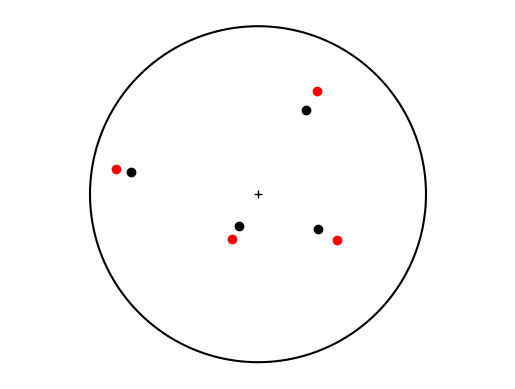

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from compgeo.pole import pole_from_plane
from compgeo.st_coord_line import st_coord_line


# Make a figure
fig, ax = plt.subplots()

# Plot the following four lines (trend and plunge)
# on an equal angle or equal area stereonet
# lines are in radians
lines = np.radians([[30, 30],[120, 45],[210, 65],[280, 15]])

# Plot the primitive of the stereonet
r = 1; # unit radius
th = np.radians(np.arange(0,361,1))
x = r * np.cos(th)
y = r * np.sin(th)
ax.plot(x,y,"k")
# Plot center of circle
ax.plot(0,0,"k+")
# Make axes equal and remove them
ax.axis("equal")
ax.axis("off")

# Find the coordinates of the lines in the
# equal angle or equal area stereonet
nrow, ncol = lines.shape
eq_angle = np.zeros((nrow, ncol))
eq_area = np.zeros((nrow, ncol))

for i in range(nrow):
    # Equal angle coordinates
    eq_angle[i,0], eq_angle[i,1] = st_coord_line(lines[i,0],
                                    lines[i,1],0) 
    # Equal area coordinates
    eq_area[i,0], eq_area[i,1] = st_coord_line(lines[i,0],
                                    lines[i,1],1)
    
# Plot the lines
# Equal angle as black dots
ax.plot(eq_angle[:,0],eq_angle[:,1],"ko")
# Equal area as red dots
ax.plot(eq_area[:,0],eq_area[:,1],"ro")
plt.show()

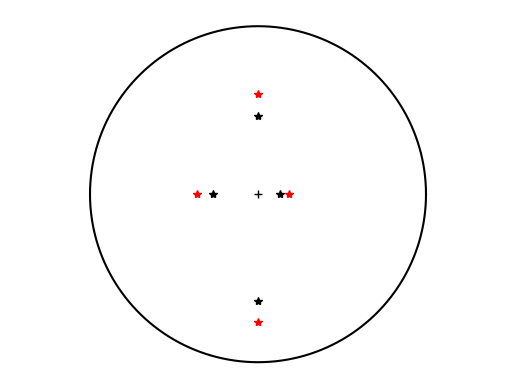

In [5]:
# Plot the following four planes (strike and dip, RHR)
# as poles on an equal angle or equal area stereonet
# planes are in radians
planes = np.radians([[0, 30], [90, 50], 
                     [180, 15], [270, 65]])

# make a figure
fig, ax = plt.subplots()

# Plot the primitive of the stereonet
ax.plot(x,y,"k")
# Plot center of circle
ax.plot(0,0,"k+")
# Make axes equal and remove them
ax.axis("equal")
ax.axis("off")

# Find the coordinates of the poles to the planes in the
# equal angle or equal area stereonet
for i in range(nrow):
    # Compute pole of plane
    trd, plg = pole_from_plane(planes[i,0],planes[i,1])
    # Equal angle coordinates
    eq_angle[i,0], eq_angle[i,1] = st_coord_line(trd,plg,0) 
    # Equal area coordinates
    eq_area[i,0], eq_area[i,1] = st_coord_line(trd,plg,1)

# Plot the poles
# Equal angle as black asterisks
ax.plot(eq_angle[:,0],eq_angle[:,1],"k*")
# Equal area as red asterisks
ax.plot(eq_area[:,0],eq_area[:,1],"r*")
plt.show()

(ch03-4)=
## Exercises

1. Modify the notebook that makes {numref}`Figure %s <ch03_fig06>` to extend the range of dip $\delta$ angles from 0 to 90 and the operator error $\varepsilon_o$ from 1 to 10.

2. Modify the notebooks that make {numref}`Figure %s <ch03_fig07>`b and c for an $\varepsilon_o$ of 5.

3. A great circle on a stereonet can be drawn by plotting closely spaced points along the great circle. These are lines on the plane. The following arrays contain the trend and plunge of lines on a plane of orientation 030/40 (strike and dip, RHR format):

    trend = \[30, 34, 38, 42, 46, 50, 54, 58, 63, 67, 72, 78, 83, 89, 95, 101, 107, 113, 120, 127, 133, 139, 145, 151, 157, 162, 168, 173, 177, 182, 186, 190, 194, 198, 202, 206, 210\]

    plunge = \[0, 3, 6, 10, 13, 16, 19, 22, 24, 27, 29, 32, 34, 36, 37, 38, 39, 40, 40, 40, 39, 38, 37, 36, 34, 32, 29, 27, 24, 22, 19, 16, 13, 10, 6, 3, 0\]

    Plot these lines on an equal angle and an equal area stereonet using the function `st_coord_line`. Don’t use a stereonet program, we will implement one in [Chapter 5](ch05).

4. A small circle on a stereonet can be drawn by plotting closely spaced points along the small circle. These are lines on the conical surface. The following arrays contain the trend and plunge of lines on a small circle of axis 050/30 (trend and plunge) and radius 20:

    trend = \[50, 53, 57, 60, 63, 66, 68, 70, 72, 73, 73, 73, 72, 70, 68, 64, 60, 55, 50, 45, 40, 36, 32, 30, 28, 27, 27, 27, 28, 30, 32, 34 37, 40, 43, 47, 50\]

    plunge = \[10, 10, 11, 12, 14, 16, 19, 22, 25, 28, 31, 35, 38, 41, 44, 47, 48, 50, 50, 50, 48, 47, 44, 41, 38, 35, 31, 28, 25, 22, 19, 16 14, 12, 11, 10, 10\]

    Plot these lines on an equal angle and an equal area stereonet using the function `st_coord_line`. What are the differences between the small circles in the equal angle and equal area stereonets?

5. The strike and dip arrays below contain the strike and dip (RHR format) of 50 bedding planes in a fold:

    strike = \[8, 22, 19, 33, 27, 37, 41, 47, 55, 40, 32, 55, 65, 68, 89, 79, 102, 105, 108, 122, 132, 136, 145, 159, 156, 164, 176, 169, 179, 173, 167, 160, 145, 148, 141, 125, 108, 92, 75, 57, 50, 39, 22,     10, 1, 9, 15, 16, 114, 78\]

    dip = \[75, 79, 68, 72, 61, 46, 50, 67, 51, 66, 55, 42, 49, 58, 54, 45, 35, 49, 63, 45, 52, 66, 52, 59, 76, 64, 72, 83, 78, 88, 72, 81, 73, 62, 50, 63, 42, 48, 56, 62, 50, 65, 76, 87, 81, 68, 74, 83, 56,     37\]

    Plot the poles to these planes in an equal area stereonet using the functions `pole_from_plane` and `st_coord_line`. The resultant diagram is called a $\pi$- diagram. What is the approximate orientation of the great circle defined by the poles? What does the pole to this great circle represent?

(ch03-5)=
## References

Allmendinger, R.W., Cardozo, N. and Fisher, D.W. 2012. Structural
Geology Algorithms: Vectors and Tensors. Cambridge University Press.

Allmendinger, R.W., Siron, C.R. and Scott, C.P. 2017. Structural data
collection with mobile devices: Accuracy, redundancy,and best practices.
Journal of Structural Geology 102, 98-112.

Allmendinger, R.W. 2020. Modern Structural Practice: A structural
geology laboratory manual for the 21st century.
\[[Online](https://www.rickallmendinger.net/download)\]. \[Accessed
March, 2021\].

Coe, A. 2010. Geological Field Techniques. Wiley-Blackwell.

Compton, R.R. 1985. Geology in the field. John Wiley & Sons.

Novakova, L. and Pavlis, T.L. 2017. Assessment of the precision of smart
phones and tablets for measurement of planar orientations: A case study.
Journal of Structural Geology 97, 93-103.

Marshak, S. and Mitra, G. 1988. Basic Methods of Structural Geology.
Prentice Hall.

Ragan, D.M. 2009. Structural Geology: An Introduction to Geometrical
Techniques. Cambridge University Press.

Wang, J., Nengpan, J., Chaoyang, H., Junchao, C. and Zheng, D. 2020.
Assessment of the accuracy of several methods for measuring the spatial
attitude of geological bodies using an android smartphone. Journal of
Structural Geology 136, 104393.

Whitmeyer, S.J., Pyle, E.J., Pavlis, T.L, Swanger, W. and Roberts, L.
2019. Modern approaches to field data collection and mapping: Digital
methods, crowdsourcing, and the future of statistical analyses. Journal
of Structural Geology 125, 29-40.

Woodcock, N.H. 1976. The accuracy of structural field measurements.
Journal of Geology 84, 350-355.